# **Dataset Telco Customer Churn**

**Penjelasan singkat mengenai dataset:**  
Jadi, pada praktikum pertama ini saya memilih dataset Telco Customer Churn. Dimana dataset ini berisi faktor-faktor apa saja yang memengaruhi apakah pelanggan tersebut akan berhenti berlangganan (Churn) atau tidak. Serta dataset ini memiliki 7043 baris dan 21 kolom. 

**Variabel pada dataset ini:**  
- customerID :  ID unik tiap pelanggan  
- gender : Jenis kelamin tiap pelanggan  
- SeniorCitizen : Apakah pelanggan termasuk lansia atau tidak  
- Partner : Apakah pelanggan memiliki pasangan atau tidak  
- Dependents : Apakah pelanggan memiliki tanggungan atau tidak  
- tenure : Jumlah bulan lamanya pelanggan telah berlangganan  
- PhoneService : Apakah pelanggan memiliki nomor telepon atau tidak
- MultipleLines : Apakah pelanggan memiliki lebih dari satu nomor telepon  
- InternetService : Jenis layanan internet pelanggan  
- OnlineSecurity : Apakah pelanggan memiliki keamanan online  
- OnlineBackup : Apakah pelanggan memiliki layanan pencadangan online  
- DeviceProtection : Apakah pelanggan memiliki perlindungan pada perangkatnya  
- TechSupport : Apakah pelanggan memiliki dukungan teknis  
- StreamingTV : Apakah pelanggan memiliki layanan streaming TV  
- StreamingMovies : Apakah pelanggan memiliki layanan streaming film  
- Contract : Jenis kontrak dari pelanggan  
- PaperlessBilling : Apakah pelanggan menggunakan tagihan tanpa kertas  
- PaymentMethod : Metode pembayaran para pelanggan  
- MonthlyCharges : Biaya bulanan pelanggan  
- TotalCharges : Total biaya yang sudah dibayarkan 
- Churn : Apakah pelanggan berhenti berlangganan atau tidak  

# **1. Import Library**

Pertama, saya melakukan import libraries yang nantinya akan dibutuhkan untuk menganalisis dan membangun model

In [1793]:
import pandas as pd 
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# **2. Load Dataset**

Kemudian, melakukan loading dataset membaca dataset "Telco Customer Churn"

In [1794]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5560,1346-PJWTK,Male,0,Yes,No,61,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,Yes,Month-to-month,No,Credit card (automatic),94.15,5731.85,No
4955,5884-GCYMI,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Mailed check,69.40,69.4,Yes
1362,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
2049,1170-SASML,Female,0,Yes,No,69,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),85.40,5869.4,No
5430,6331-LWDTQ,Male,0,No,No,10,Yes,Yes,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),72.15,794.25,Yes
1138,0774-IFUVM,Male,0,Yes,Yes,11,Yes,Yes,DSL,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),65.15,723.35,No
5691,5619-XZZKR,Male,0,No,No,4,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.95,68.2,No
4957,4486-EFAEB,Male,0,No,No,13,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.40,251.65,No
1875,9637-CDTKZ,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.10,8086.4,No
2665,8166-ORCHU,Male,1,Yes,No,33,Yes,No,Fiber optic,Yes,Yes,No,Yes,No,Yes,One year,Yes,Electronic check,93.55,3055.5,No


# **3. Data Understanding**

### a) Memahami Struktur Data

Nah, dari sini dapat kita lihat bahwa dalam dataset ini terdapat 21 kolom dan 7043 baris

In [1795]:
print('DataFrame Composition:\nColumns: {} \nRows: {}'.format(df.shape[1],df.shape[0]))

DataFrame Composition:
Columns: 21 
Rows: 7043


Lalu, saya memanggil fungsi info() untuk melihat tipe data dari tiap kolomnya dan mengecek apakah ada kolom yang memiliki nilai yang hilang (Null)

In [1796]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### b) Melihat Statistik Deskriptif

Selanjutnya, saya memanggil fungsi describe() untuk menampilkan informasi statistik deskriptif dari kolom numerik. Dan dapat kita lihat bahwa pada rata-rata (mean) dan standart deviasinya (std) ada perbedaan skala yang jauh antar kolom numerik 

In [1797]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### c) Memeriksa Data Null

Lalu, disini saya memanggil fungsi isnull() untuk mengecek apakah ada kolom yang memiliki nilai hilang (Null). Dan hasilnya menunjukkan bahwa tidak ada kolom yang mengandung nilai yang hilang (Null)

In [1798]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Kemudian, saya juga memanggil fungsi isna() untuk mengecek apakah ada kolom yang memiliki nilai kosong (NaN). Dan hasilnya menunjukkan bahwa tidak ada kolom yang mengandung nilai yang kosong (NaN)

In [1799]:
print(df.isna().sum()) 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### d) Memeriksa Data Duplikat

Terakhir, saya juga mengecek apakah ada data yang terduplikat, dan hasilnya adalah 0 atau tidak ada data yang duplikat

In [1800]:
print(df.duplicated().sum())

0


# **4. Exploratory Data Analysis (EDA)**

### a) Melihat Distribusi Target

Pertama, disini saya ingin melihat terlebih dahulu jumlah dari distribusi targetnya. Dan hasilnya menunjukkan bahwa kelompok "No" berjumlah 5174 data dan kelompok "Yes" berjumlah 1869 data, dimana disini membuktikkan bahwa adanya ketidakseimbangan dataset

C:\Users\Dicky Zulfikar\AppData\Local\Temp\ipykernel_15752\1184756756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='coolwarm')


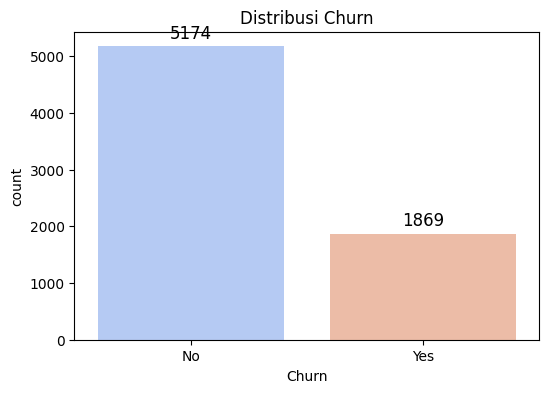

In [1801]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Churn', data=df, palette='coolwarm')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12, padding=3)

plt.title("Distribusi Churn")
plt.show()

### b) Melihat Korelasi

Selanjutnya, melihat korelasi antar kolom numerik. Pada hasil heatmap dibawah dapat dilihat bahwa pada kolom "tenure" dan "TotalCharges" memiliki korelasi yang cukup tinggi sebesar 0.83. Namun, dalam kasus kali ini saya tidak ingin menghapus salah satu dari kedua kolom yang memiliki korelasi tinggi tersebut, karna saya menganggap korelasi sebesar 0.83 masih bisa diterima dan tidak menjadi masalah besar.

Beda halnya jika ada dua kolom yang memiliki korelasi diatas 0.9, mungkin perlu dipertimbangkan untuk menghapus salah satu

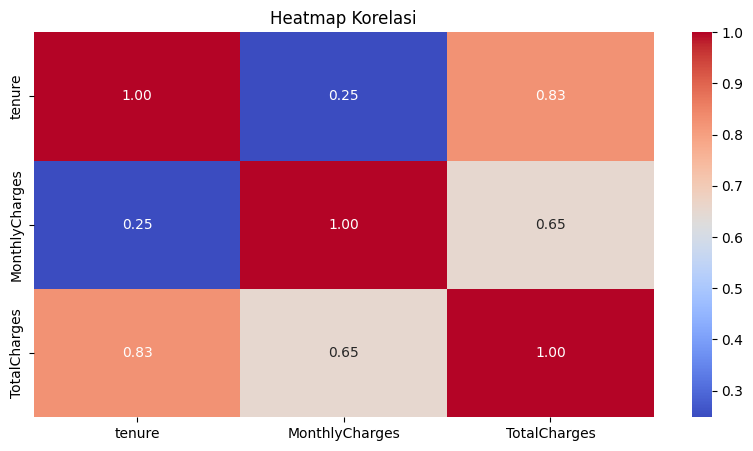

In [1802]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df_numeric = df[["tenure", "MonthlyCharges", "TotalCharges"]]

plt.figure(figsize=(10, 5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")  
plt.title("Heatmap Korelasi")
plt.show()

### c) Melihat Distribusi dari Kolom Numerik

Lalu, saya juga melihat distribusi dari kolom numerik menggunakan histogram. Dari hasil visualisasi histogram tersebut menunjukkan ketia kolom numerik memiliki distribusi yang tidak normal, karna terdapat puncak yang naik turun maupun puncak yang condong ke kanan. Untuk mengatasi hal ini, maka selanjutnya akan dilakukan normalisasi pada tahap pre-processing

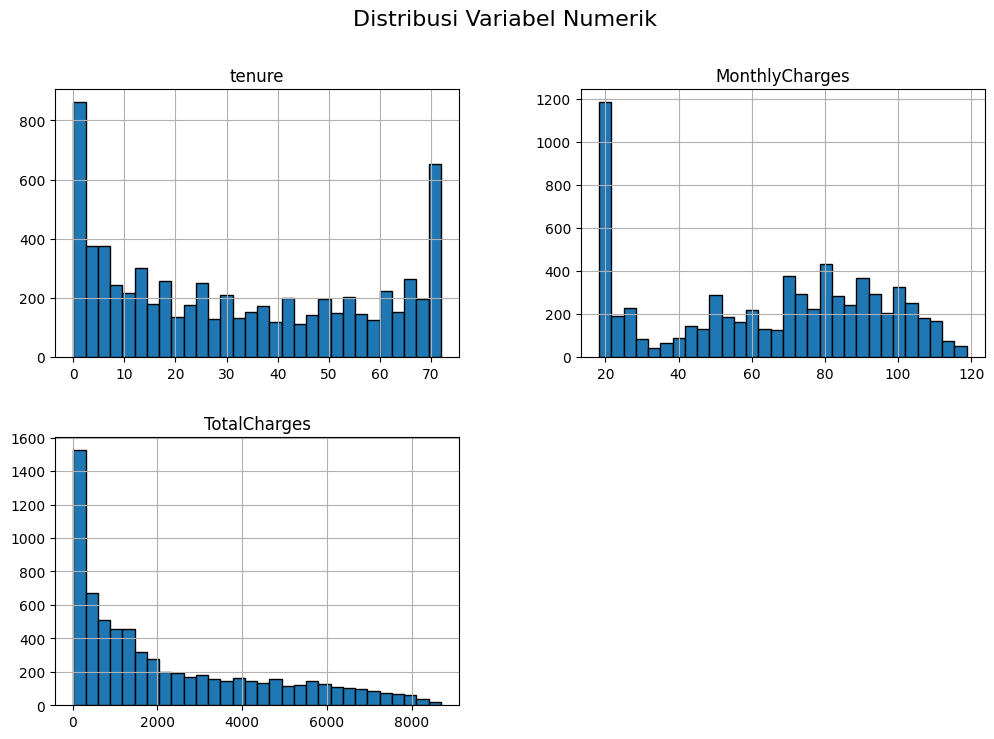

In [1803]:
df_numeric.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

### d) Melihat Distribusi dari Kolom Kategorik

Dari visualisasi pie chart untuk kolom kategorik ini kita bisa melihat distribusi atau jumlah proporsinya

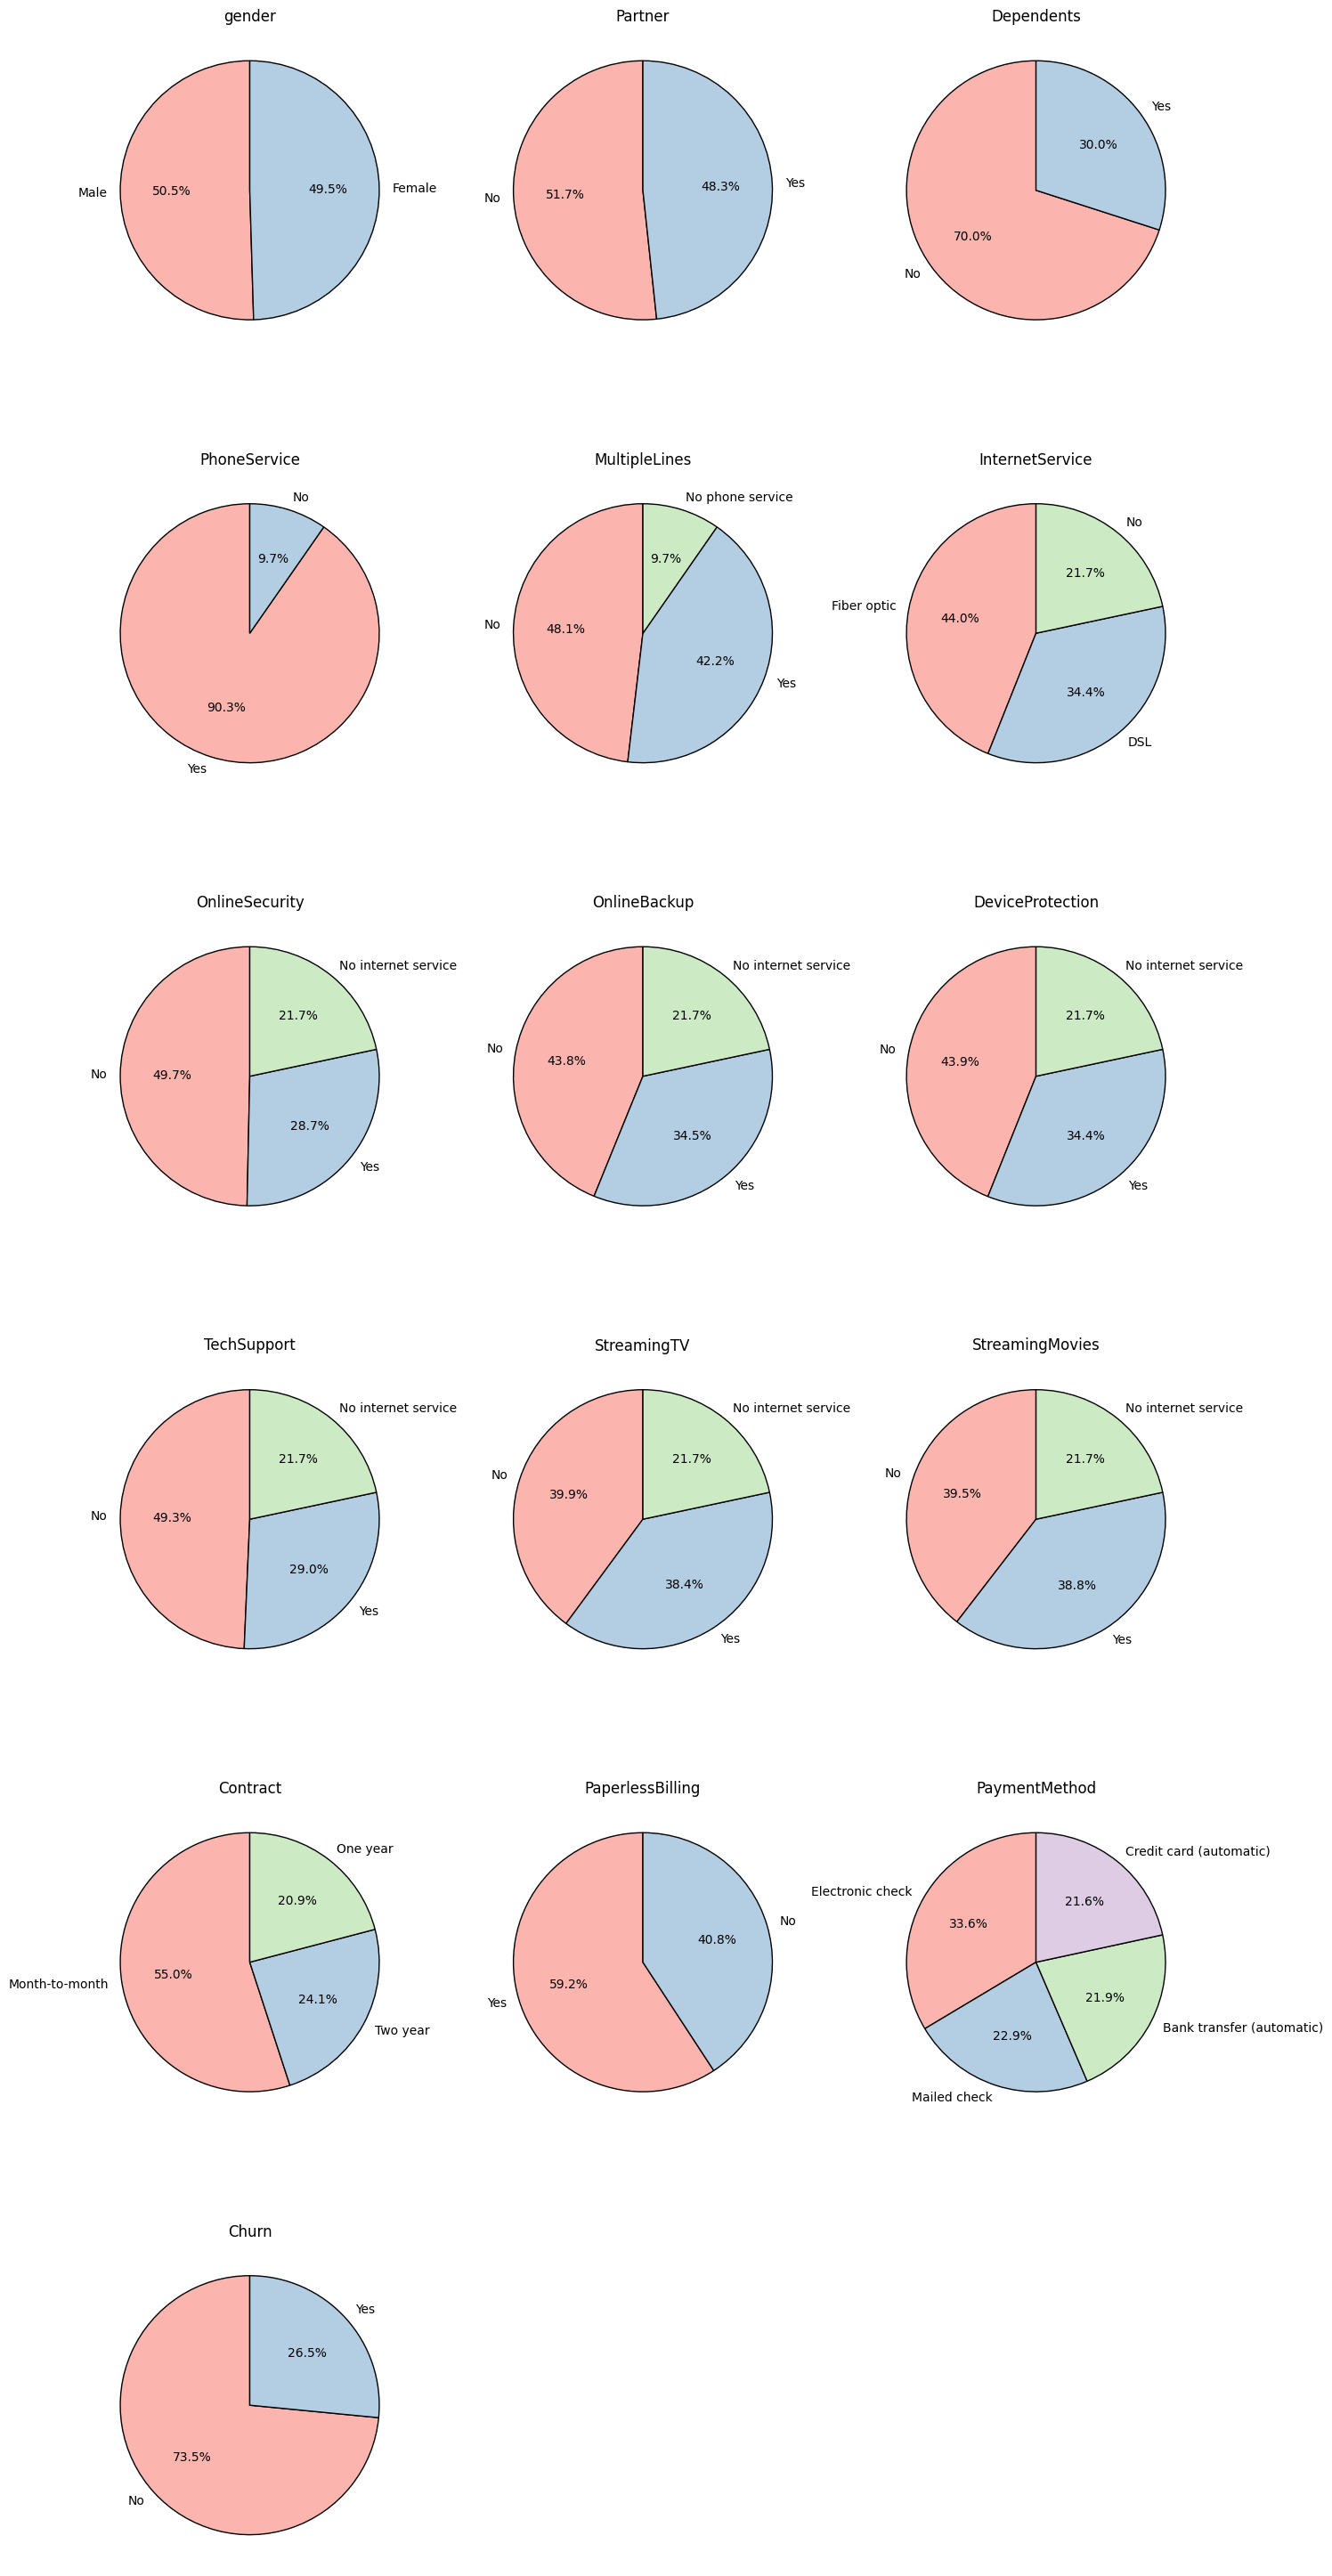

In [1804]:
df_categorical = df[["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                    "PaperlessBilling", "PaymentMethod", "Churn"]]
cat_cols = df_categorical.columns
num_cols = len(cat_cols)
rows = (num_cols // 3) + 1

plt.figure(figsize=(15, rows * 5))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, 3, i) 
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors, wedgeprops={'edgecolor': 'black'})
    plt.title(col)
    plt.ylabel('')  
plt.tight_layout()
plt.show()

### e) Menampilkan Boxplot

Selanjutnya, menampilkan boxplot untuk melihat apakah ada data outlies atau noise. Dan kebetulan dalam dataset ini tidak ada outlier pada kolom numeriknya

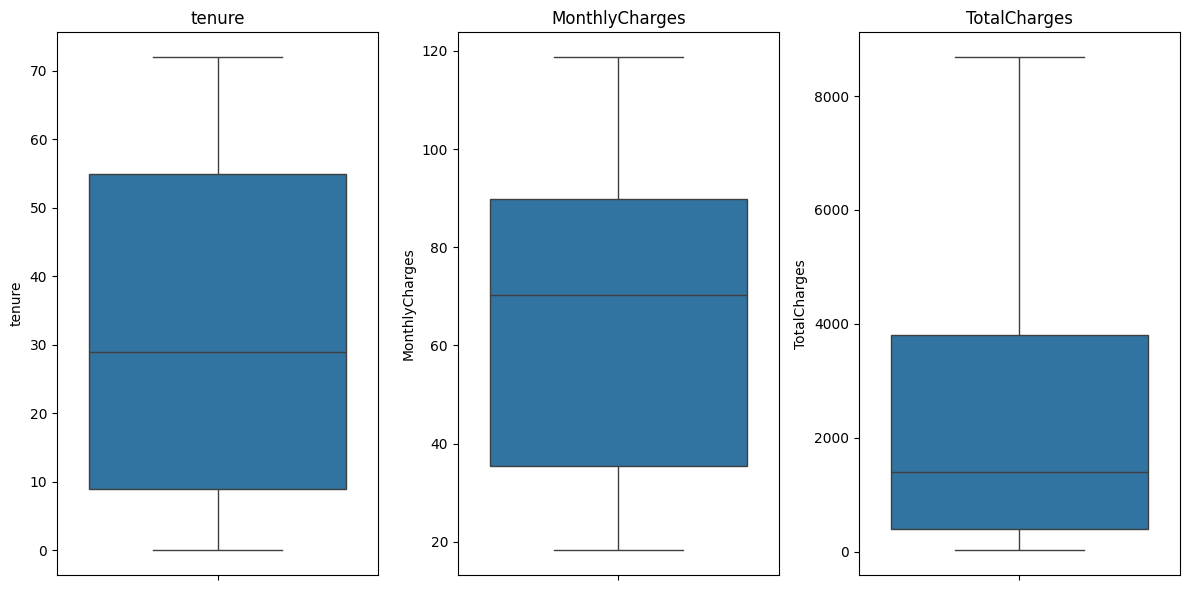

In [1805]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(df_numeric, 1):
    plt.subplot(1, 3, i)  
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# **5. Data Preprocessing (Preparation)**

### a) Menghapus kolom yang tidak penting
Disini saya memutuskan untuk menghapus kolom "customerID" karna kolom ini menurut saya tidak diperlukan untuk analisa lanjutan

In [1806]:
df.drop(columns=["customerID"], inplace=True)

### b) Menangani Data NaN

In [1807]:
print(df.isna().sum())

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Karna pada beberapa kolom isi datanya bukan hanya "Yes" atau "No", seperti 'No internet service' atau 'No phone service', maka untuk menghindari adanya nilai yang kosong (NaN) dan untuk menjaga konsistensi data, saya menggantinya dengan "No"

In [1808]:
replace_cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df[replace_cols] = df[replace_cols].replace({'No internet service': 'No', 'No phone service': 'No'})

Selain itu, saya juga mengisi nilai yang kosong (NaN) pada kolom "TotalCharges" dengan rata-rata (mean)

In [1809]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

Sehingga, dapat kita dapatkan sudah tidak ada nilai yang kosong (NaN)

In [1810]:
print(df.isna().sum().sum())

0


### c) Konversi data kategorik menjadi numerik
Karna ada beberapa kolom yang mengandung data kategorikal, dan model hanya bisa menerima tipe data numerik, maka kita perlu mengubah tipe data yang sesuai terlebih dahulu


**1. One Hot Encoding**  
Pertama saya menggunakan metode one-hot encoding untuk memberi label encode untuk beberapa kolom yang memiliki  tipe data object yang memiliki lebih dari dua kategori (bukan hanya "Yes" dan "No")

In [1811]:
df = pd.get_dummies(df, columns= ["gender", "MultipleLines", "InternetService", "OnlineSecurity", 
                    "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
                    "StreamingMovies", "Contract", "PaymentMethod"])

**2. Label Encoder**  
Kedua, saya menggunakan metode label encoder untuk memberi label encode untuk beberapa kolom yang hanya memiliki dua kategori, yaitu "Yes" dan "No"

In [1812]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

Nah, sekarang dapat kita lihat bahwa pada kolom kategorik yang sudah  diencoding telah berubah menjadi format numerik dengan nilai 0 dan 1 ataupun True dan False

In [1813]:
pd.set_option('display.max_columns', None)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,False,True,False,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,True,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,True,True,False,True,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False


### d) Memisahkan data fitur dan target

Selanjutnya, saya membagi dataset menjadi fitur (X) dan target (y). Dimana variabel fitur (X) berisi semua kolom kecuali kolom "Churn", dan kolom "Churn" menjadi variabel target (y) yang akan diprediksi nantinya

In [1814]:
X = df.drop(columns=['Churn'])
y = df['Churn']

Kemudian, saat dicek ternyata jumlah kelas pada variabel target memiliki jumlah yang cukup jauh

In [1815]:
y.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

### e) Imbalance Dataset

Karna jumlah distribusi kedua kelasnya cukup jauh, maka saya melakukan imbalance dataset dengan menggunakan metode SMOTE. Metode SMOTE ini bekerja seperti Over Sampling karna menambahkan sampel sintetis pada kelas minoritas untuk menyeimbangkan distribusi datanya. Sehingga dapat kita lihat pada outputnya, untuk kelas 0 dan 1 sekarang sudah seimbang dengan jumlah data sebanyak 5174

In [1816]:
smote = SMOTE(random_state=42, k_neighbors=15)
X_smote, y_smote = smote.fit_resample(X, y)
print(Counter(y_smote))

Counter({0: 5174, 1: 5174})


### f) Normalisasi

Karna pada analisis visualisasi histogram menunjukkan adanya distribusi yang tidak normal, maka pada tahap inilah saya melakukan normalisasi untuk kolom numerik. Normalisasi kali ini menggunakan MinMax Scaler untuk mengubah nilai dalam rentang 0 hingga 1

In [1817]:
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
df_numeric = df[numeric_cols]
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df_numeric)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0.013889,0,1,0.115423,0.001275,0,True,False,True,False,True,False,False,True,False,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0.472222,1,0,0.385075,0.215867,0,False,True,True,False,True,False,False,False,True,True,False,False,True,True,False,True,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0.027778,1,1,0.354229,0.010310,1,False,True,True,False,True,False,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0.625000,0,0,0.239303,0.210241,0,False,True,True,False,True,False,False,False,True,True,False,False,True,False,True,True,False,True,False,False,True,False,True,False,False,False
4,0,0,0,0.027778,1,1,0.521891,0.015330,1,True,False,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False,False,False,False,True,False


# **6. Data Splitting**

Langkah selanjutnya, melakukan split data menjadi 3 bagian yaitu data train, test, dan validation. Data dibagi menjadi training (70%), validation (20% dari training), dan test (30%)

In [1818]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote,
                                                    test_size=0.3, random_state=42, stratify=y_smote)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, 
                                                      random_state=42, stratify=y_train)
print(X_train.shape) 
print(X_valid.shape) 
print(X_test.shape) 

(5794, 34)
(1449, 34)
(3105, 34)


# **7. Model Training**

Untuk pemodelannya, saya menguji 6 model klasifikasi sebagai perbandingan model mana yang memiliki performa paling baik. Terdapat model Logistic Regression, Random Forest, XGBoost, KNN, Decision Tree, dan GaussianNB. Kemudian model yang telah dilatih ini lalu disimpan dalam dictionary trained_models untuk dilakukan evaluasi lebih lanjut

In [1819]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights="distance", metric="manhattan"),
    "DecisionTree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "GaussianNB": GaussianNB()
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train) 
    trained_models[name] = model

c:\Users\Dicky Zulfikar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Dicky Zulfikar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:23:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


# **8. Model Evaluation**

### a) Metrik Evaluasi

Pertama saya mengevaluasi performa 6 model menggunakan metrik acuracy, precision, recall, dan f1-score pada data validasi. Lalu, hasil evaluasinya disimpan dalam dataframe df_evaluation dan diurutkan berdasarkan skor acuracy tertinggi. Dan didapatkan model Random Forest sebagai model yang memiliki akurasi tertinggi

In [1820]:
evaluation_results = []

for name, model in trained_models.items():
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    precision = precision_score(y_valid, y_pred, average="weighted")
    recall = recall_score(y_valid, y_pred, average="weighted")
    f1 = f1_score(y_valid, y_pred, average="weighted")
    evaluation_results.append([name, accuracy, precision, recall, f1])

df_evaluation = pd.DataFrame(
    evaluation_results, 
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)
df_evaluation.sort_values(by="Accuracy", ascending=False) 

,Model,Accuracy,Precision,Recall,F1-Score
1,Random Forest,0.870255,0.870983,0.870255,0.870194
0,Logistic Regression,0.849551,0.849877,0.849551,0.849518
2,XGBoost,0.849551,0.850239,0.849551,0.849480
4,DecisionTree,0.821256,0.821285,0.821256,0.821251
5,GaussianNB,0.799862,0.800771,0.799862,0.799706
3,KNN,0.781228,0.787241,0.781228,0.780062


### b) Classification Report

Kemudian saya mengecek classification report dari model Random Forest yang menunjukkan performa baik dengan accuracy, precision, recall, dan f1-score sebesar 86% untuk kedua kelas. Hasil ini mengindikasikan bahwa model mampu mengklasifikasikan data dengan baik

In [1821]:
y_test_pred_rf = trained_models["Random Forest"].predict(X_test)
print("Classification Report Model Random Forest :\n")
print(classification_report(y_test, y_test_pred_rf))

Classification Report Model Random Forest :

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1553
           1       0.86      0.86      0.86      1552

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



### c) Confusion Matrix

Evaluasi terakhir menampilkan confusion matrix yang menunjukkan bahwa model Random Forest berhasil mengklasifikasikan 1336 (TN) pada kelas 0 dengan benar dan 1327 (TP) pada kelas 1 dengan benar. Namun, terdapat 217 (FP) dan 225 (FN), yang menunjukkan beberapa kesalahan prediksi yang dilakukan oleh model

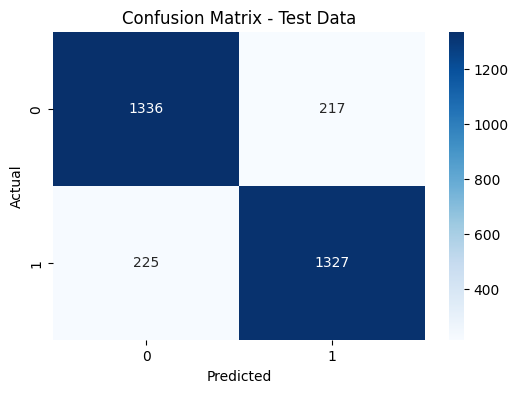

In [1822]:
cm = confusion_matrix(y_test, y_test_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Data")
plt.show()